In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sb
#from sklearn import metrices


In [2]:
from google.colab import files
uploaded =files.upload()

Saving CO2 Emissions.csv to CO2 Emissions.csv


In [3]:
data = pd.read_csv('CO2 Emissions.csv')
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Text(0, 0.5, 'CO2 Emissions(g/km)')

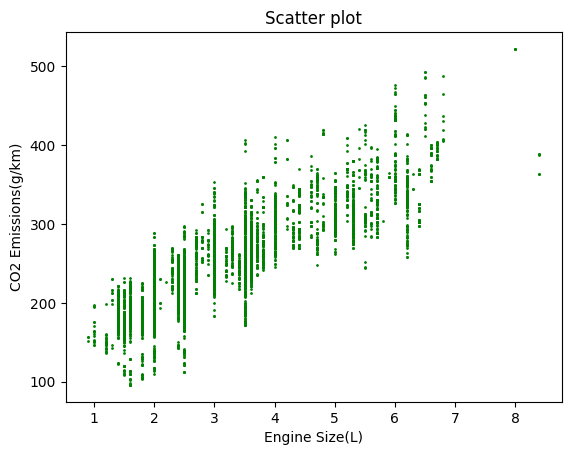

In [ ]:
x=data[['Engine Size(L)']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='green');
plt.title('Scatter plot')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

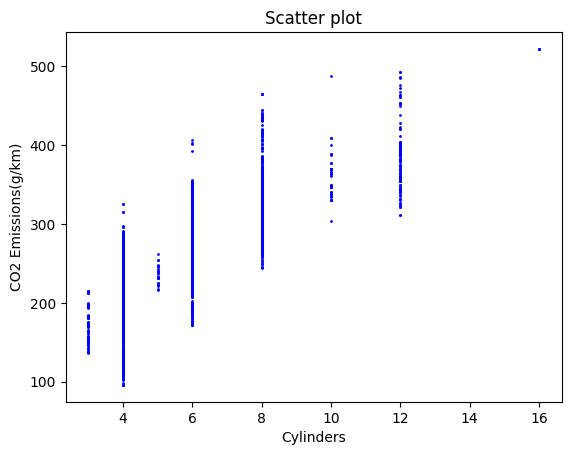

In [ ]:
x=data[['Cylinders']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='blue');
plt.title('Scatter plot')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

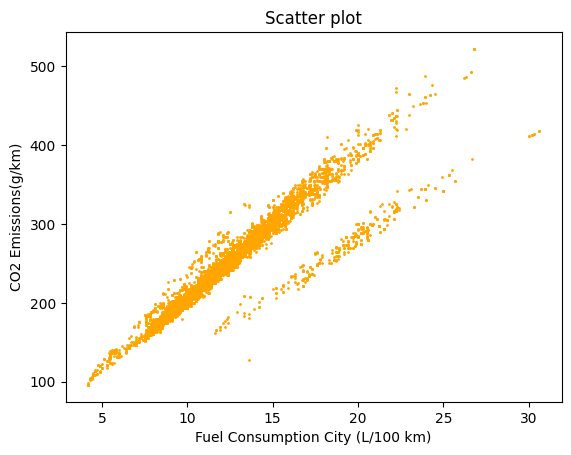

In [ ]:
x=data[['Fuel Consumption City (L/100 km)']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='orange');
plt.title('Scatter plot')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

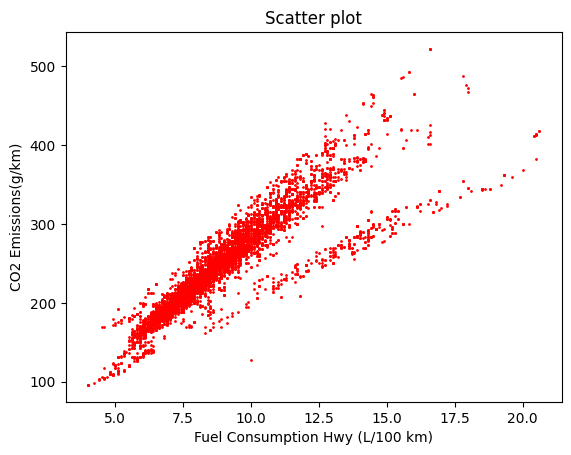

In [ ]:
x=data[['Fuel Consumption Hwy (L/100 km)']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='red');
plt.title('Scatter plot')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

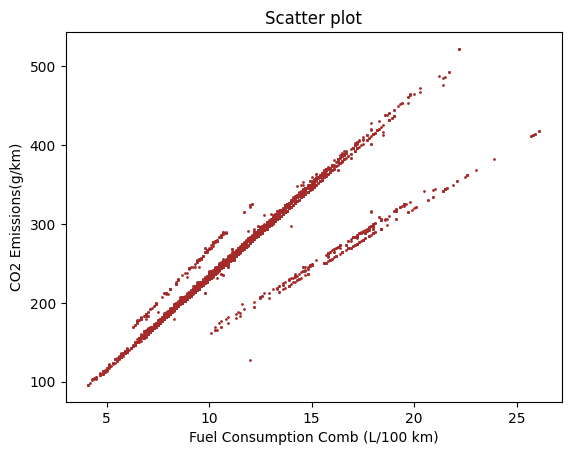

In [ ]:
x=data[['Fuel Consumption Comb (L/100 km)']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='brown');
plt.title('Scatter plot')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')

Text(0, 0.5, 'CO2 Emissions(g/km)')

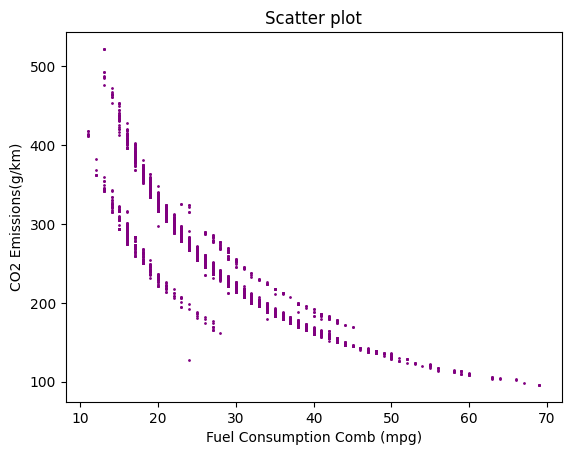

In [ ]:
x=data[['Fuel Consumption Comb (mpg)']]
y=data['CO2 Emissions(g/km)']

plt.scatter(x,y,s=1,c='purple');
plt.title('Scatter plot')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('CO2 Emissions(g/km)')

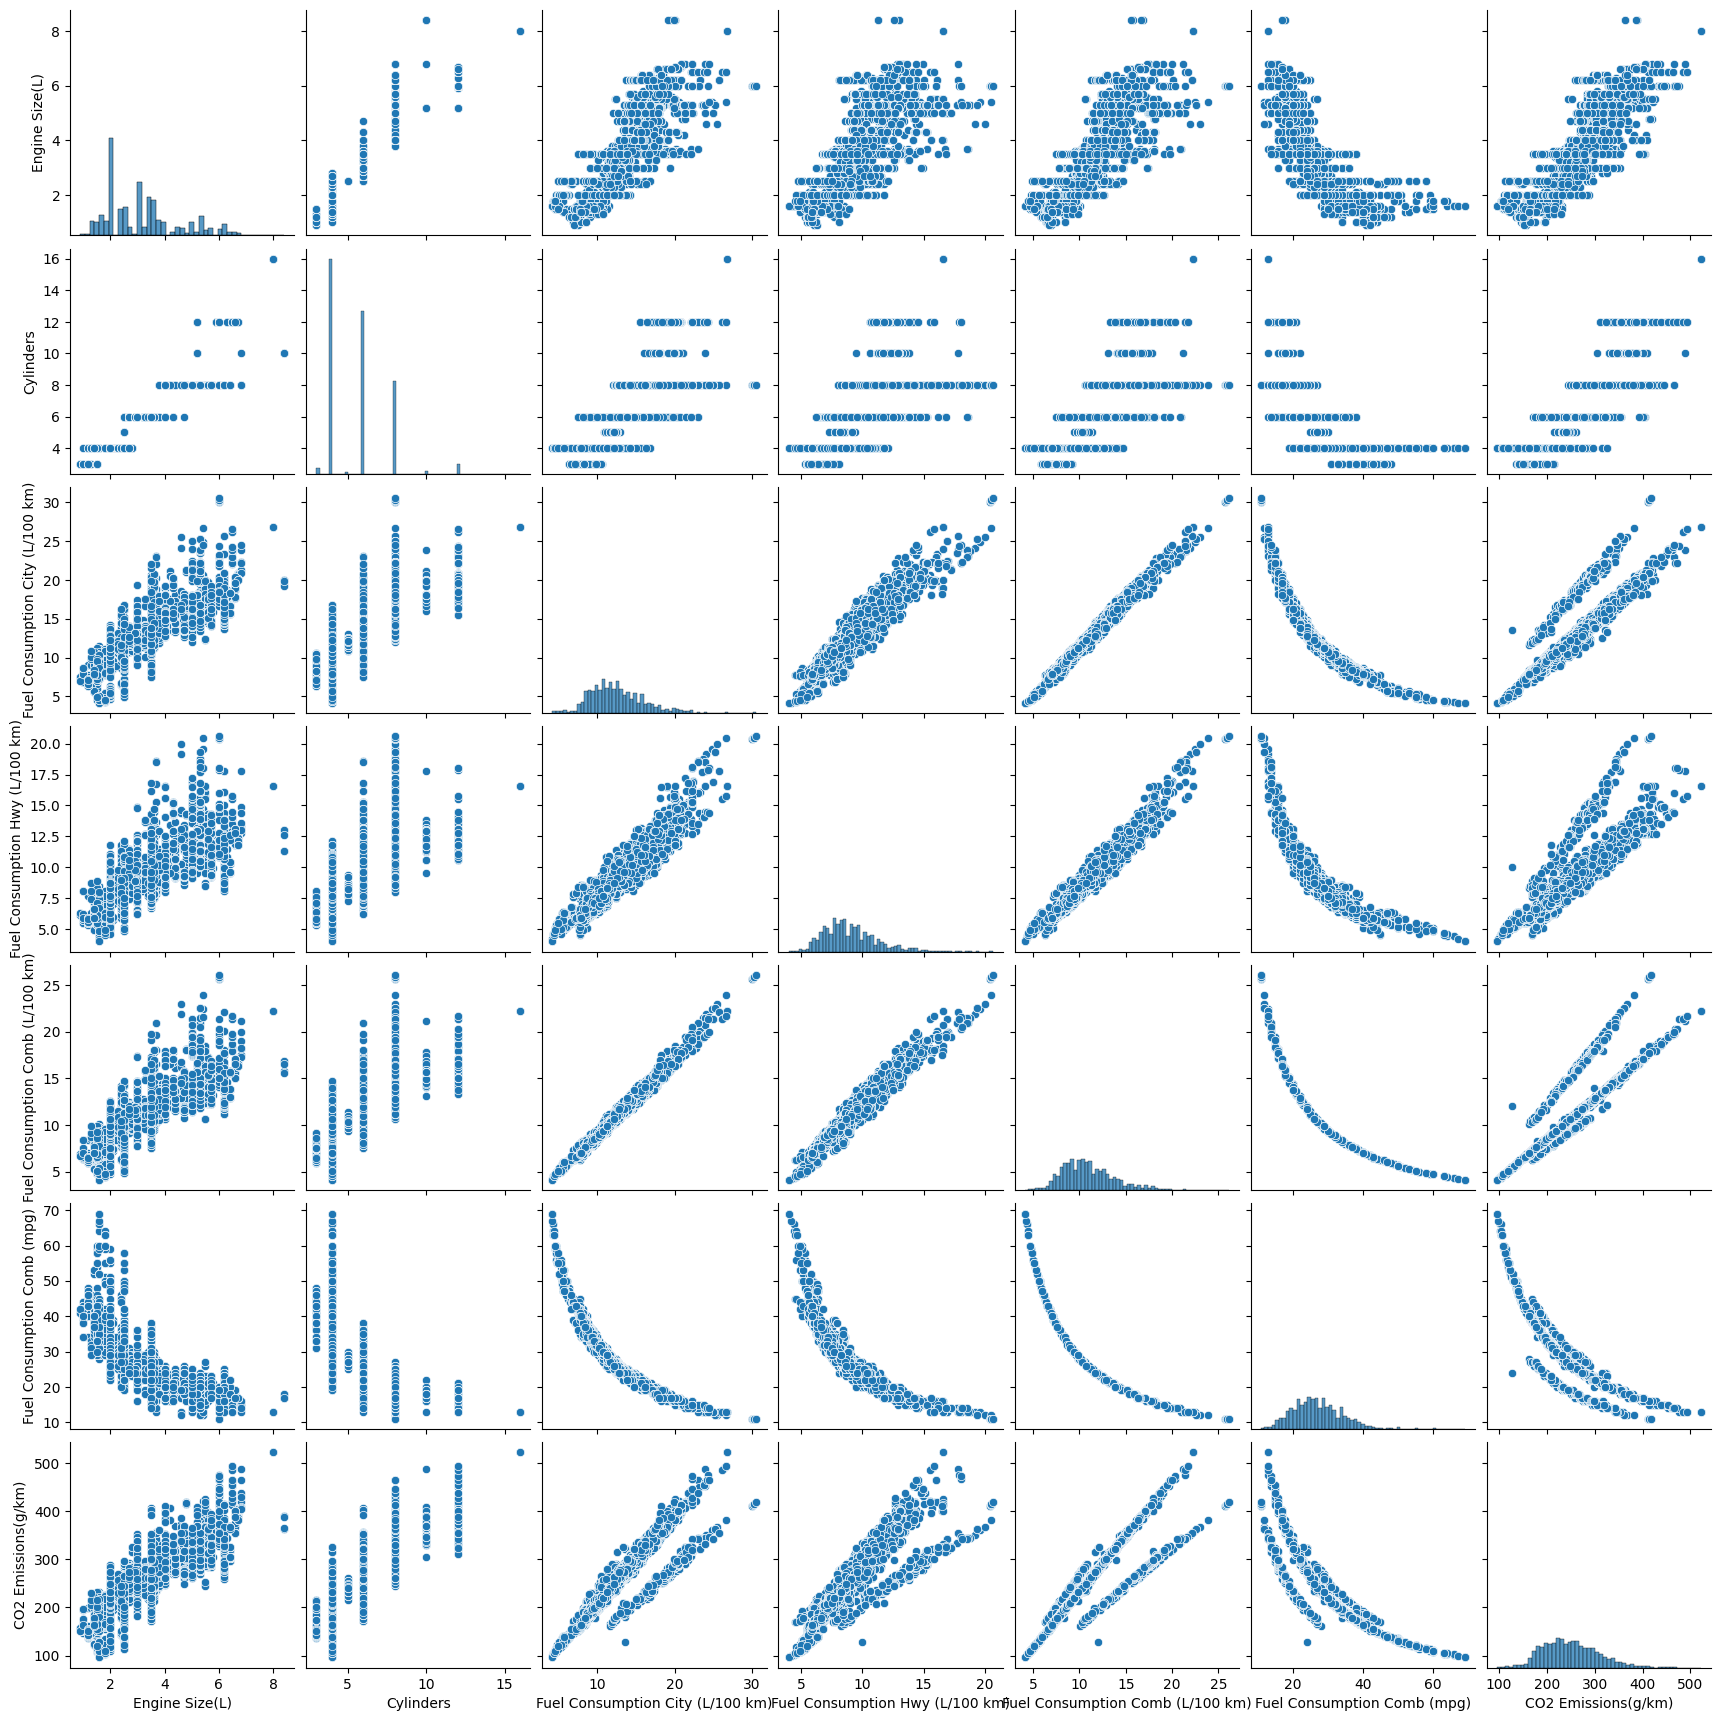

In [ ]:
#pairplot
sb.pairplot(data)
plt.show()

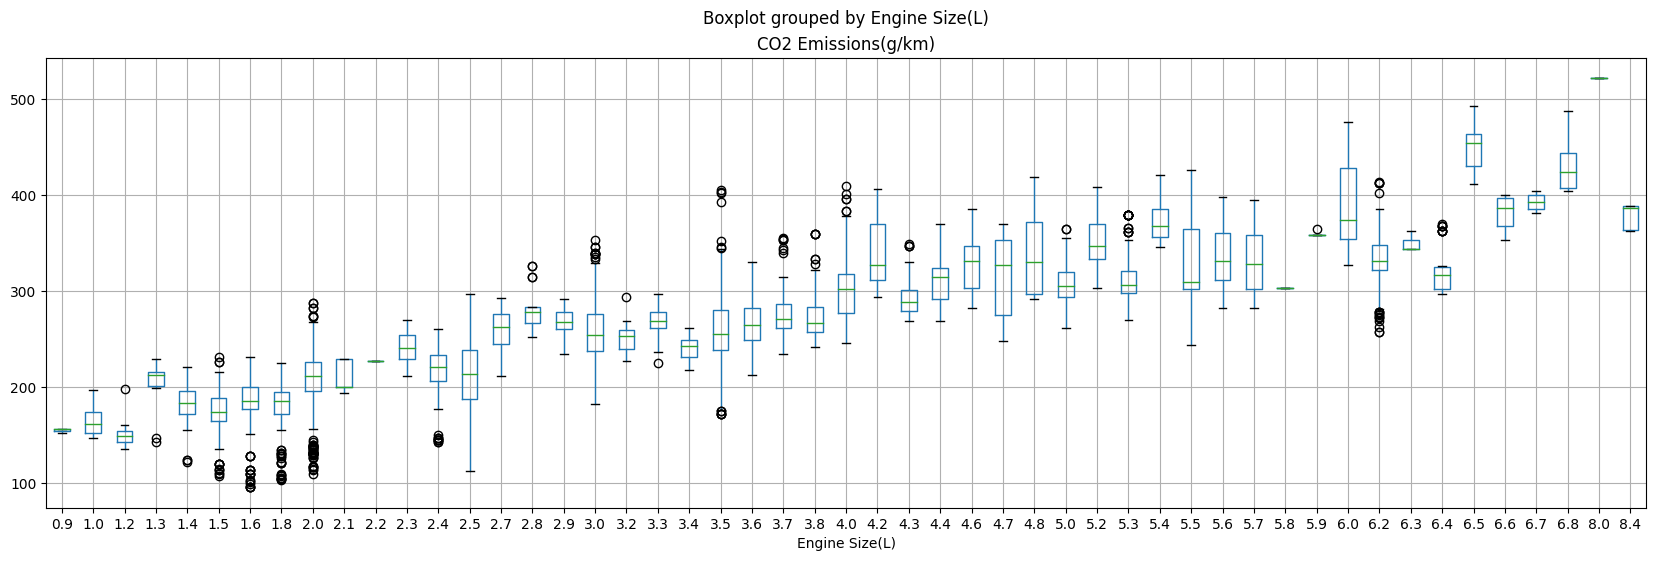

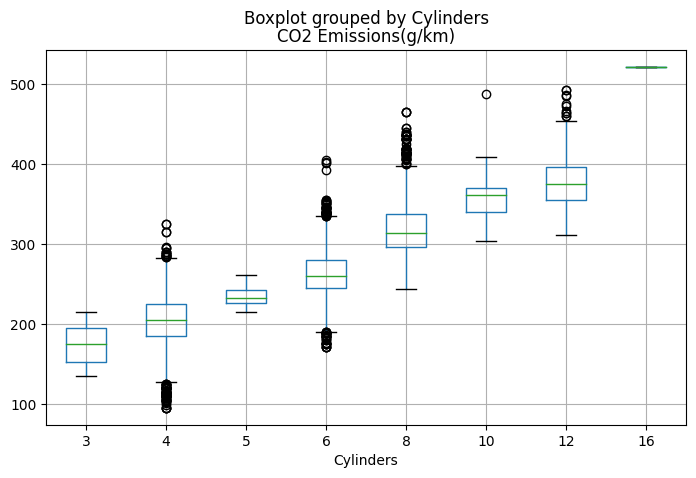

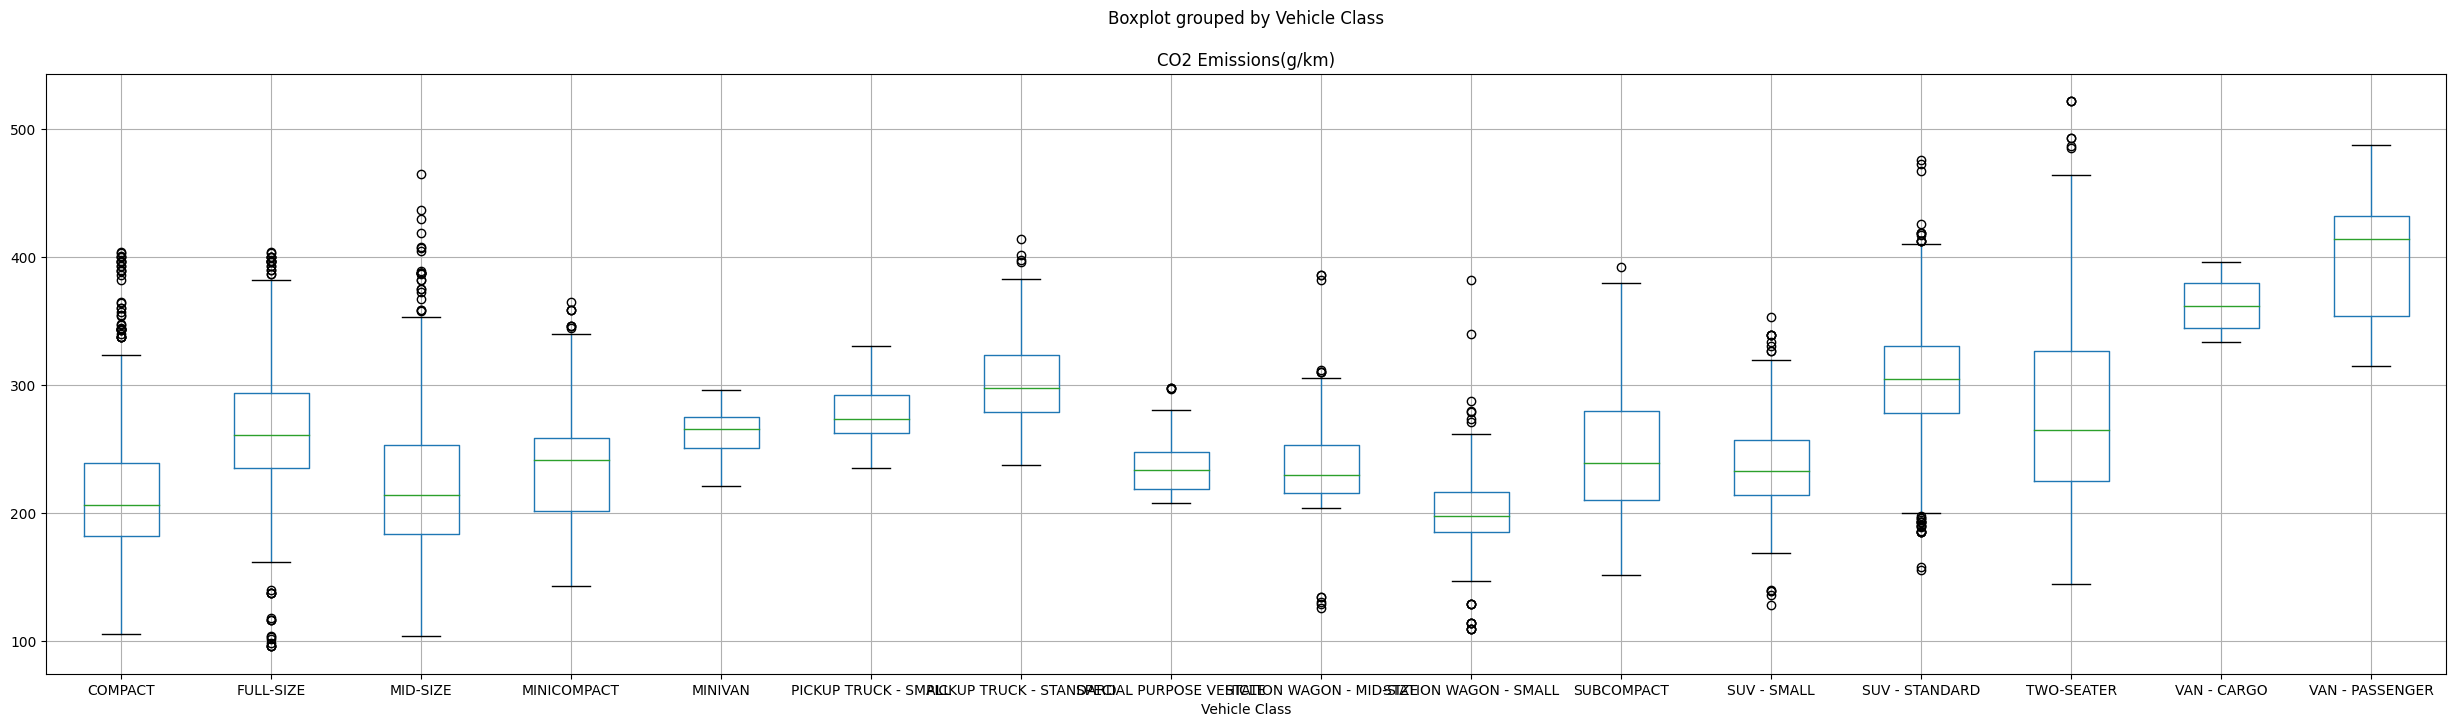

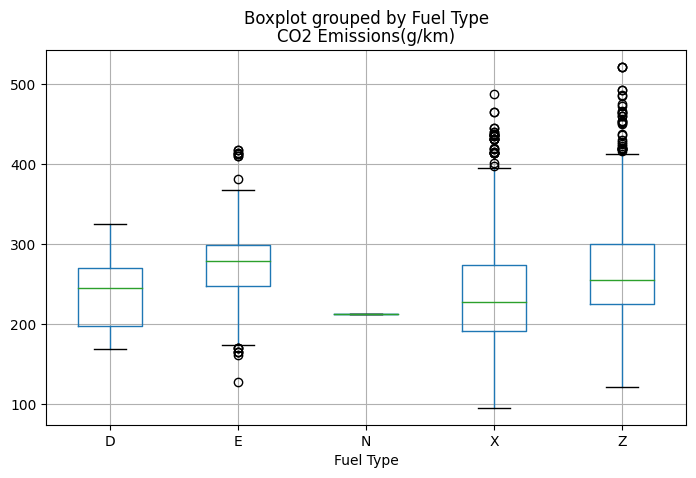

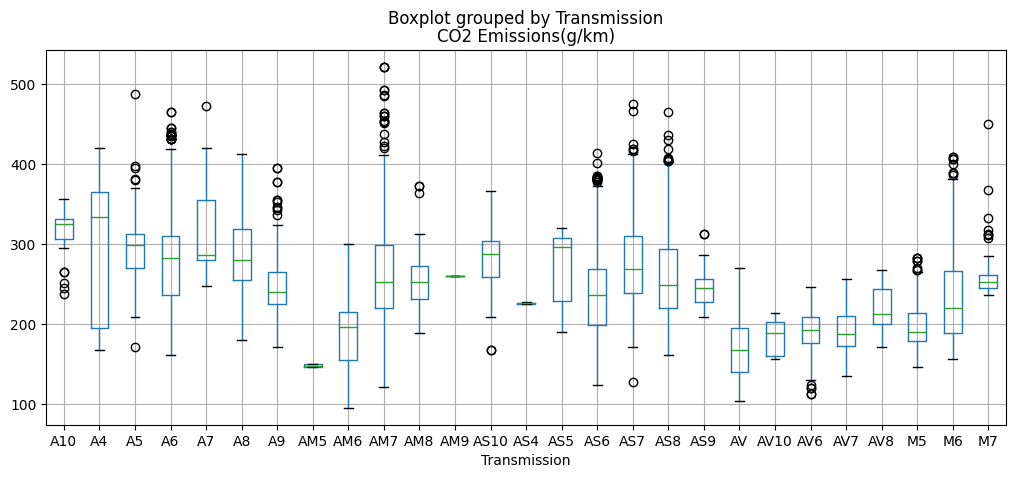

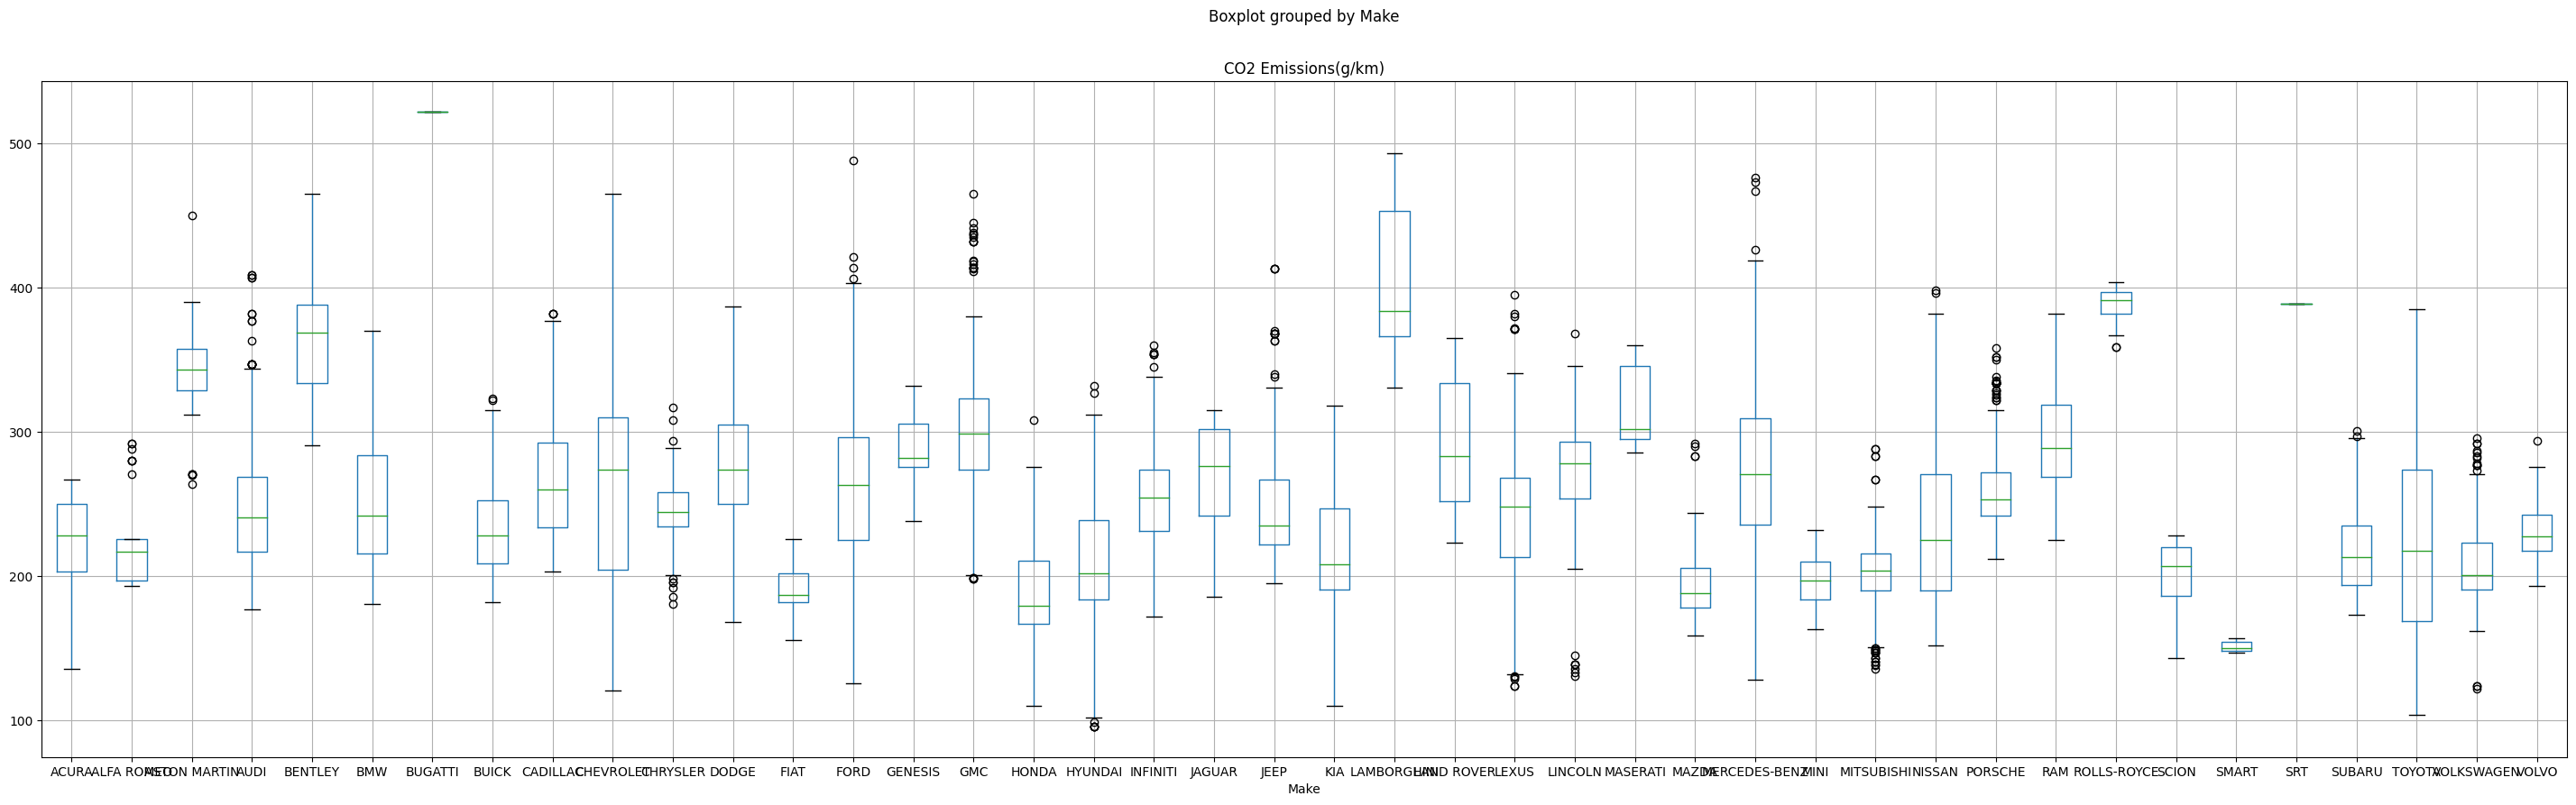

In [16]:
#box plot
ax=data.boxplot(column="CO2 Emissions(g/km)",by="Engine Size(L)",figsize=(20,6))
bx=data.boxplot(column="CO2 Emissions(g/km)",by="Cylinders",figsize=(8,5))
cx=data.boxplot(column="CO2 Emissions(g/km)",by="Vehicle Class",figsize=(30,8))
dx=data.boxplot(column="CO2 Emissions(g/km)",by="Fuel Type",figsize=(8,5))
ex=data.boxplot(column="CO2 Emissions(g/km)",by="Transmission",figsize=(12,5))
fx=data.boxplot(column="CO2 Emissions(g/km)",by="Make",figsize=(35,10))


<ipython-input-18-0fbdddb5a52b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(),cmap='BuPu',annot=True)


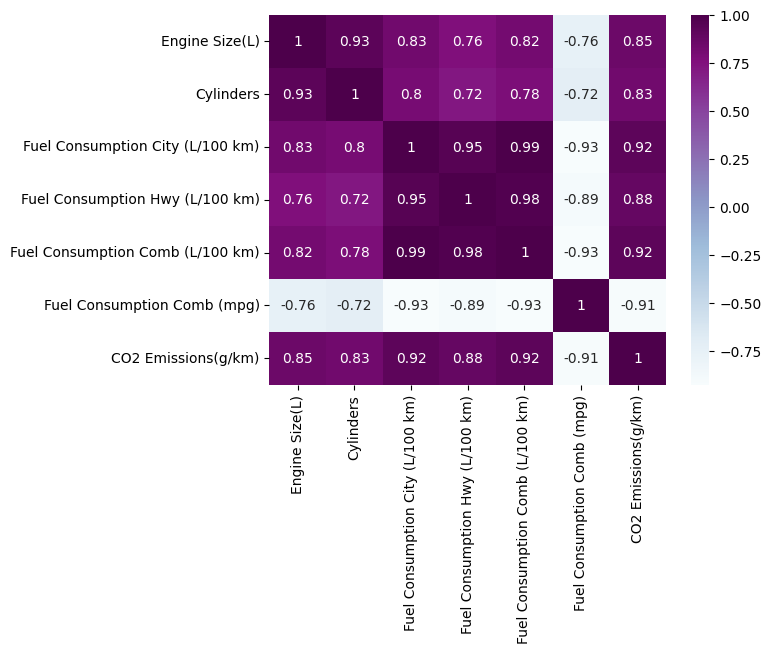

In [ ]:
#corelation heatmap
dataplot = sb.heatmap(data.corr(),cmap='BuPu',annot=True)

plt.show()

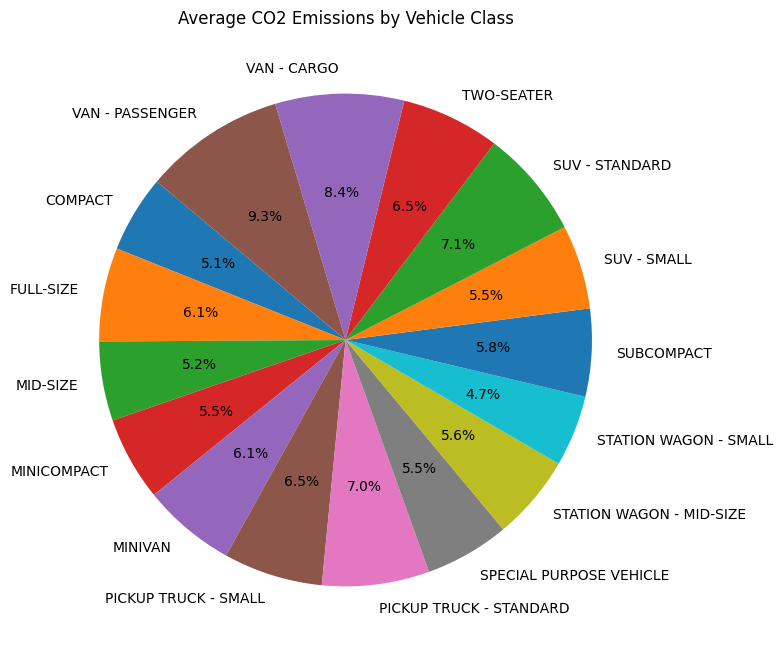

In [18]:
#Pie chart to represent average % of CO2 emission by different behicle class
average_emissions1 = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
plt.figure(figsize=(8,8))
plt.pie(average_emissions1, labels=average_emissions1.index, autopct='%1.1f%%', startangle=140)

plt.title('Average CO2 Emissions by Vehicle Class')
plt.show()

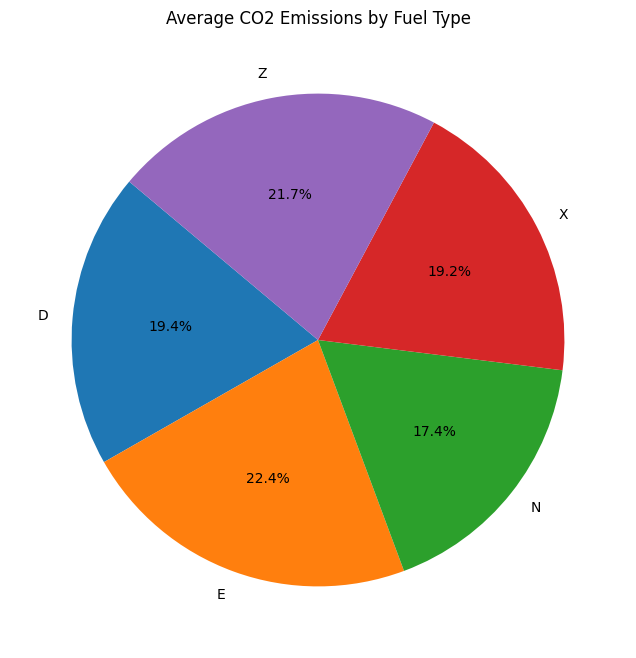

In [19]:
average_emissions2 = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()
plt.figure(figsize=(8,8))
plt.pie(average_emissions2, labels=average_emissions2.index, autopct='%1.1f%%', startangle=140)

plt.title('Average CO2 Emissions by Fuel Type')
plt.show()


In [18]:


standard_data = StandardScaler().fit_transform(dt.drop(columns=['CO2 Emissions(g/km)']))
print(standard_data.shape)

(7385, 6)


<ipython-input-23-123b376f5709>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',palette="bright")


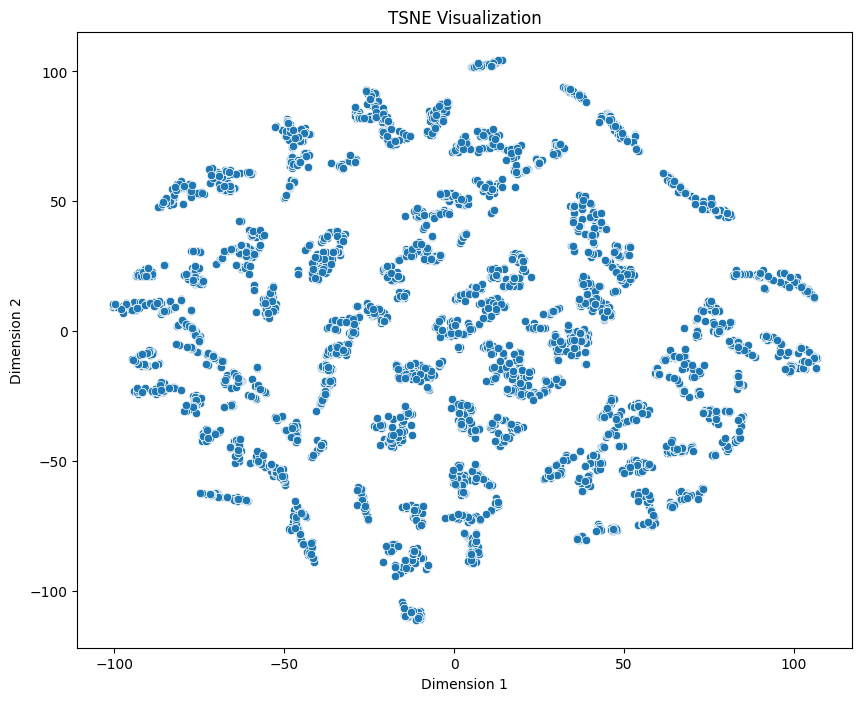

In [23]:
#q3 b part
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Extracting features (excluding any non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])

# Standardize the data
standardized_data = StandardScaler().fit_transform(numeric_data)

# TSNE for dimensionality reduction to 2 components
model = TSNE(n_components=2,random_state=10, n_iter=1500)
tsne_data = model.fit_transform(standardized_data)

tsne_df = pd.DataFrame(data=tsne_data, columns=["Dim_1", "Dim_2"])

plt.figure(figsize=(10, 8))
sb.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',palette="bright")
plt.title('TSNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
